![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/visual-nlp/7.2.SparkOcrPretrainedPipelines.ipynb)

# Example of Pretrained Pipelines
Pretrained Pipelines can be considered predefined recipes in the form of Visual NLP pipelines, these recipes come with a set of stages and parameters that help to accomplish specific tasks.

## Blogposts and videos

- [Text Detection in Spark OCR](https://medium.com/spark-nlp/text-detection-in-spark-ocr-dcd8002bdc97)

- [Table Detection & Extraction in Spark OCR](https://medium.com/spark-nlp/table-detection-extraction-in-spark-ocr-50765c6cedc9)

- [Extract Tabular Data from PDF in Spark OCR](https://medium.com/spark-nlp/extract-tabular-data-from-pdf-in-spark-ocr-b02136bc0fcb)

- [Signature Detection in Spark OCR](https://medium.com/spark-nlp/signature-detection-in-spark-ocr-32f9e6f91e3c)

- [GPU image pre-processing in Spark OCR](https://medium.com/spark-nlp/gpu-image-pre-processing-in-spark-ocr-3-1-0-6fc27560a9bb)

- [How to Setup Spark OCR on UBUNTU - Video](https://www.youtube.com/watch?v=cmt4WIcL0nI)


**More examples here**

https://github.com/JohnSnowLabs/spark-ocr-workshop

### Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
!pip install -q johnsnowlabs

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, visual, medical

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.settings.enforce_versions=True
nlp.install(refresh_install=True, visual=True)

### Initialize Spark session

In [4]:
# Automatically load license data and start a session with all jars user has access to
spark = nlp.start(visual=True)

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_9005.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==5.3.1, 💊Spark-Healthcare==5.3.0, 🕶Spark-OCR==5.3.0, running on ⚡ PySpark==3.4.0


## Load Pretrained Pipelines

### mixed_scanned_digital_pdf
In this simple pipeline we can use the predefined pipeline to handle a mix of scanned(containing images) and digital PDFs(containing digital text). The output is going to be returned in a Dataframe column, and it will contain texts coming from both sources.</br>
You could even have a single PDF file with a mix of digital and scanned pages.</br>
Other Options:</br>
* __mixed_scanned_digital_pdf_image_cleaner__: same as above but cleaning noise from images.</br>
* __mixed_scanned_digital_pdf_skew_correction__: same as above but with page rotation correction.

In [5]:
mixed_pdf_pipeline = nlp.PretrainedPipeline('mixed_scanned_digital_pdf', 'en', 'clinical/ocr')

mixed_scanned_digital_pdf download started this may take some time.
Approx size to download 6.7 KB
[OK!]


In [8]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/visual-nlp/mixed_pdfs/immortal_image.pdf
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/visual-nlp/mixed_pdfs/immortal_text.pdf

In [10]:
!mkdir mixed

!mv immortal_image.pdf immortal_text.pdf mixed/

### Call the pipeline
We are listing the 'mixed_pdfs' folder, that one contains two PDF files, one is scanned and the other is digital. You can open them yourself and verify.

In [11]:
pdf_path = '/content/mixed'
!ls /content/mixed

immortal_image.pdf  immortal_text.pdf


We will display using the dataframe

In [12]:
pdf_example_df = spark.read.format("binaryFile").load(pdf_path).cache()
result = mixed_pdf_pipeline.transform(pdf_example_df)
result

+--------------------+--------------------+------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+-----------+-------+-----------+--------------------+---------+
|                path|    modificationTime|length|                text|           positions|height_dimension|width_dimension|             content|               image|total_pages|pagenum|documentnum|          confidence|exception|
+--------------------+--------------------+------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+-----------+-------+-----------+--------------------+---------+
|file:/content/mix...|2024-04-04 10:59:...|243543|                 ...|[{[{w, 14.4, 25.2...|             383|            284|[25 50 44 46 2D 3...|                null|          0|      0|          0|-1.79769313486231...|     null|
|file:/content/mix...|2024-04-04 10:59:...| 90047|would have been a...|[{[{would have be...|             841|            595|[25 50 44 46 2D 3...|{file:/content/mi...|          1|      0|          0|   95.63247501148896|     null|
+--------------------+--------------------+------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+-----------+-------+-----------+--------------------+---------+

And to avoid truncation, using collect() on just the text column,

In [13]:
r = result.select("text").collect()

In [14]:
r[1]

Row(text='would have been a liberation, a joy, and a fiesta.\n\nHe sensed that had he been able to choose or\n\ndream his death that night, this is the death he\n\nwould have dreamed or chosen.\n\nDahlmann firmly grips the knife, which he\n\nmay have no idea how to manage, and steps out\n\ninto the plains.\n\nThe Aleph\n\n(1949)\n\nThe Immortal\n\nSolomon saith: There is no new thing upon\n\nthe earth. So that as Plato had an imagination,\n\nthat all knowledge was but remembrance; so\n\nSolomon giveth his sentence, that all novelty is\n\nbut oblivion.\n\nFrancis Bacon: Essays, LVIII\n\nIn London, in early June of the year 1929,\n')

### image_handwritten_transformer_extraction
Let's use another example, this time for doing transformer based OCR on handwritten texts. </br>
Other similar options are,

* __image_printed_transformer_extraction__: OCR printed texts contained on images.
* __pdf_printed_transformer_extraction__: OCR printed texts contained in PDFs.
* __pdf_handwritten_transformer_extraction__: OCR handwritten texts contained in PDFs.

In [15]:
image_handwritten_transformer_extraction = nlp.PretrainedPipeline('image_handwritten_transformer_extraction', 'en', 'clinical/ocr')

image_handwritten_transformer_extraction download started this may take some time.
Approx size to download 494 MB
[OK!]


### Load image and display it

In [ ]:
!wget -O handwritten_example.jpg https://github.com/JohnSnowLabs/spark-nlp-workshop/raw/master/visual-nlp/data/handwritten_example.jpg

In [ ]:
imagePath = "/content/handwritten_example.jpg"
image_df = spark.read.format("binaryFile").load(imagePath)
visual.display_images(visual.BinaryToImage().transform(image_df), "image")

### display results

In [19]:
result = image_handwritten_transformer_extraction.transform(image_df).cache()
print(("").join([x.text for x in result.select("text").collect()]))

This is an example of handwritten
teerxt
Let's # check the performance !
I hope it will be awesome .


### Visualize intermediate results
Let's take a look at the detected text.


    Image #0:
    Origin: file:/content/handwritten_example.jpg
    Resolution: 0 dpi
    Width: 4608 px
    Height: 3456 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


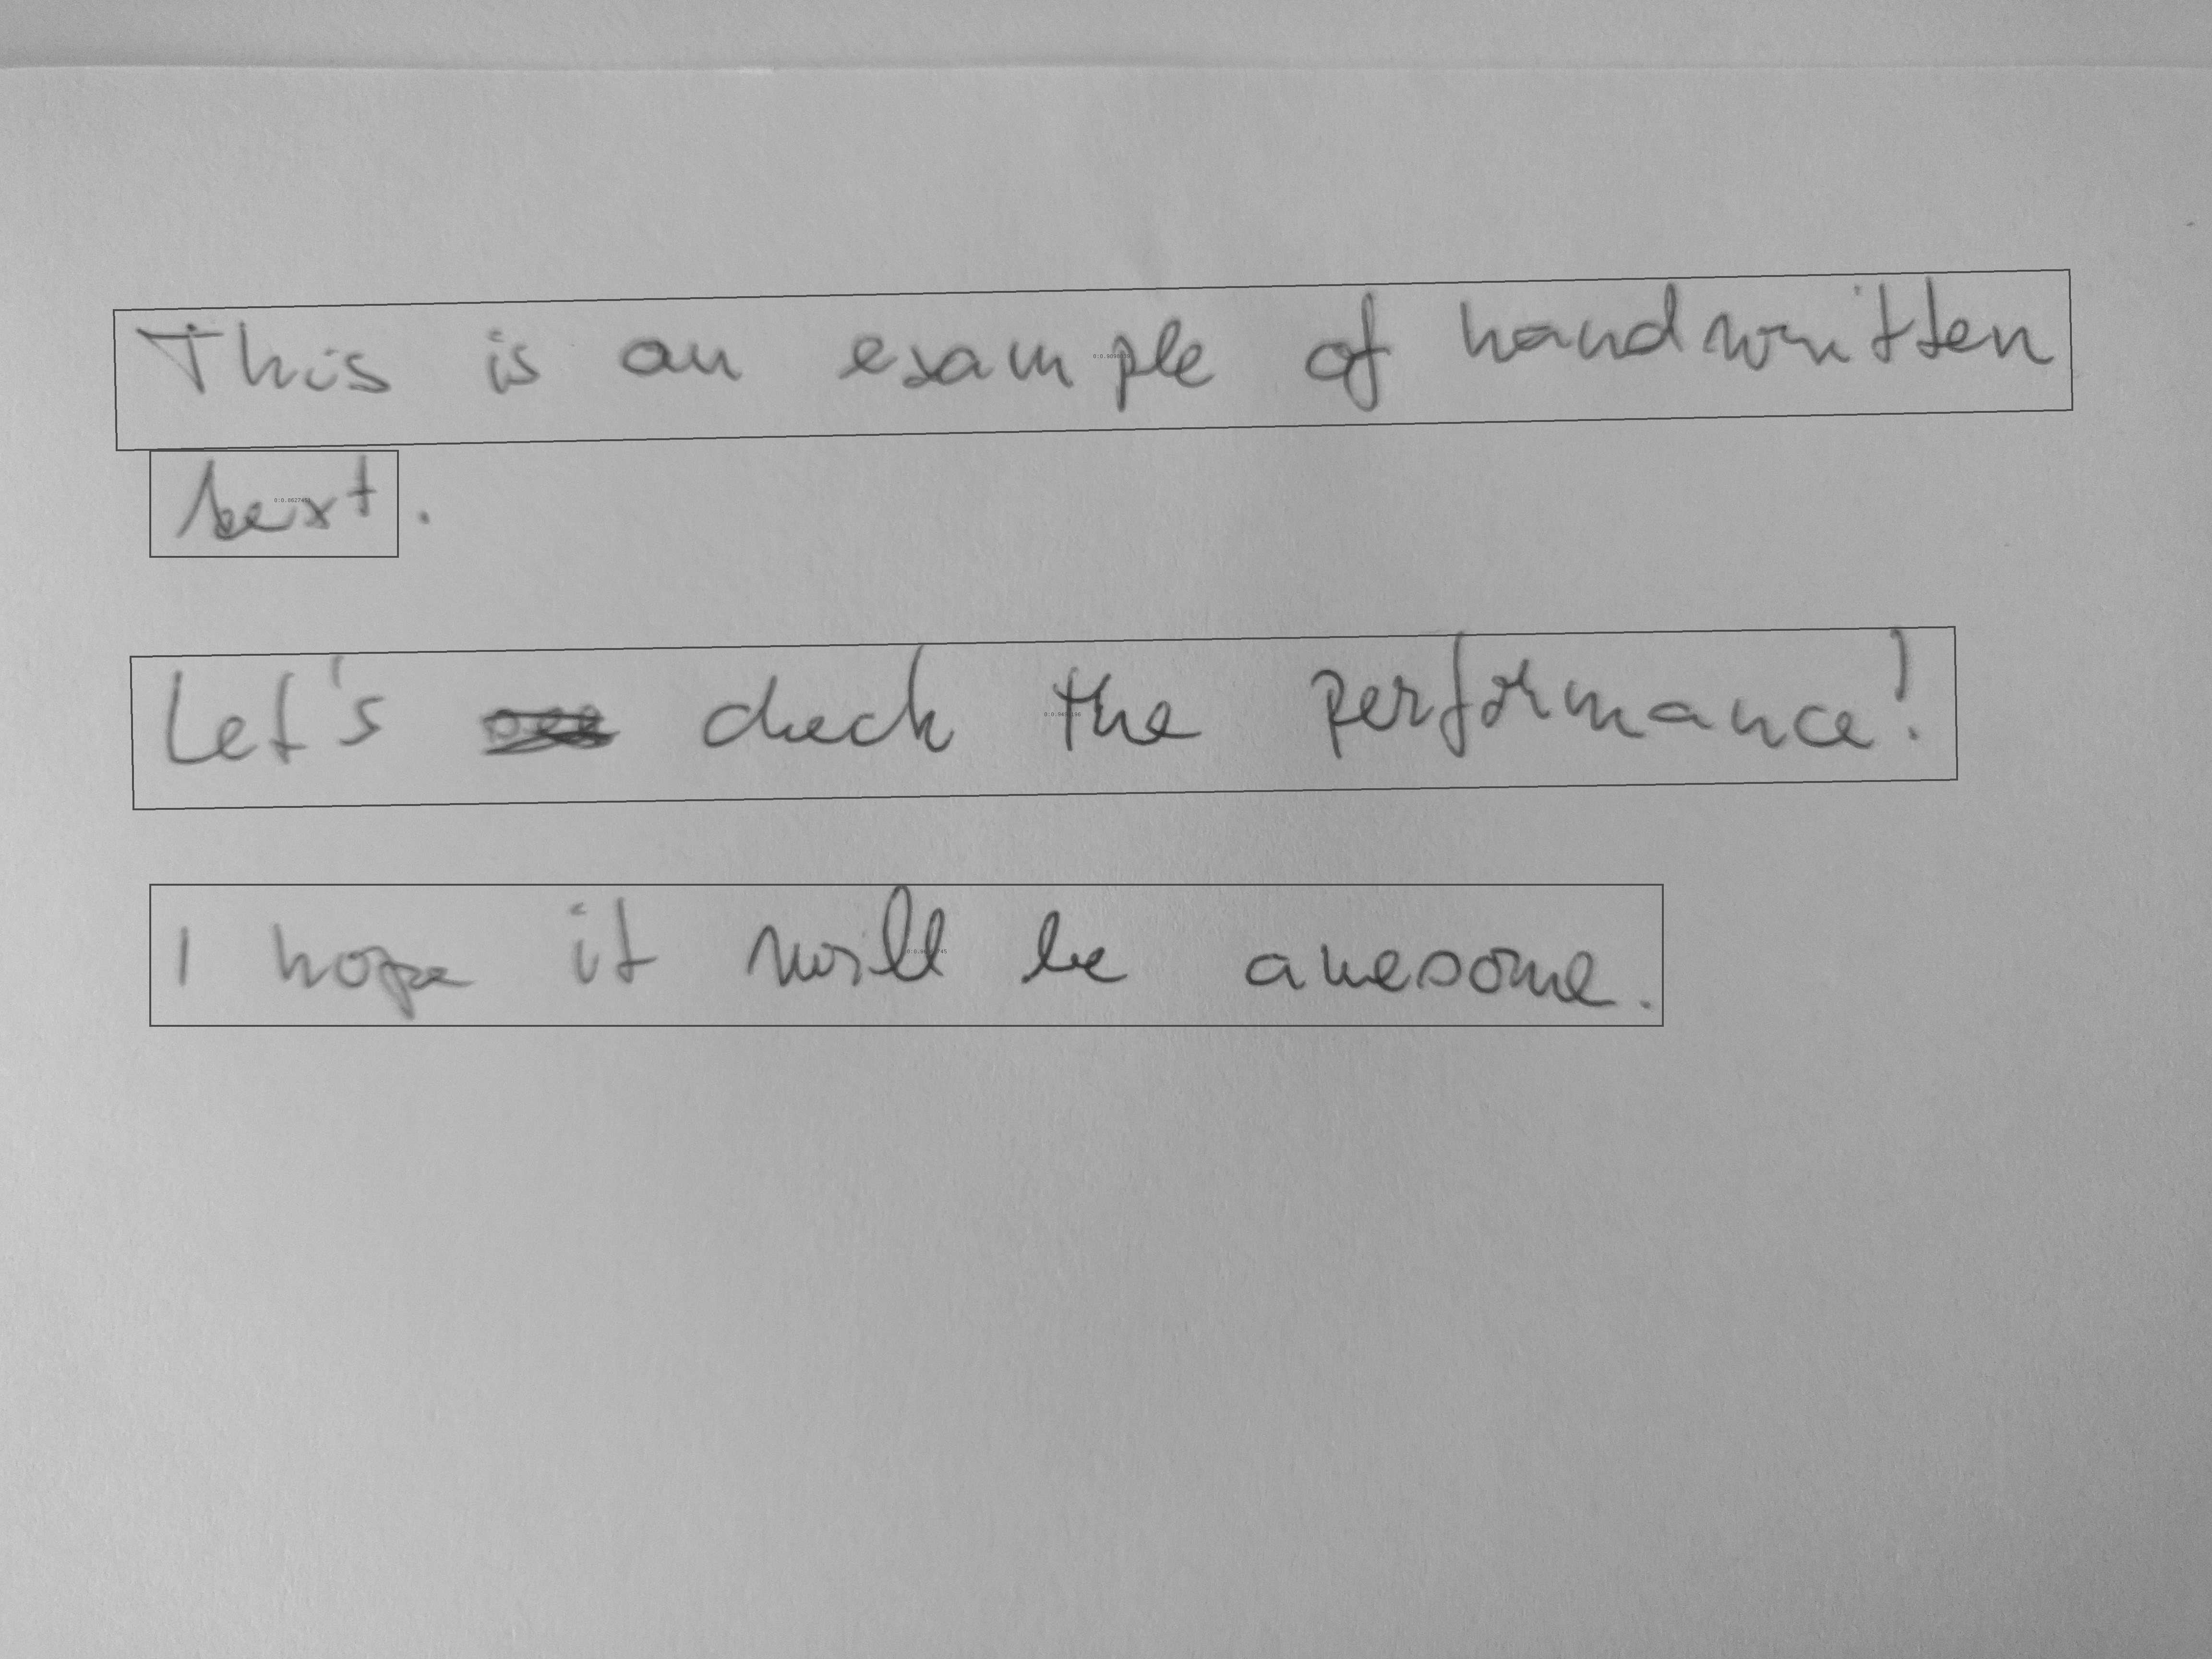

In [21]:
draw_regions = visual.ImageDrawRegions() \
    .setInputCol("image") \
    .setInputRegionsCol("text_regions") \
    .setOutputCol("image_with_regions") \
    .setRectColor(visual.Color.green) \
    .setRotated(True)

visual.display_images(draw_regions.transform(result), "image_with_regions")